# Text Analysis
Reference: 
http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html

http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html#b-creating-the-word-cloud-b-creating-the-word-cloud


http://www.nltk.org/book/ch03.html


### Before Starting

If you have not already, from terminal, run `pip install twitter` to download python's twitter package.

Also, run the command `pip install git+git://github.com/amueller/word_cloud.git` on terminal

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from nltk import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk
import string
nltk.download('punkt')

from urllib.request import urlopen 
import re                                                                                                                
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

[nltk_data] Downloading package punkt to /Users/gm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Reading data from the Web

In [2]:
little_women_url = 'http://www.gutenberg.org/cache/epub/35534/pg35534.txt'
little_women_text = read_url(little_women_url)
chapters = little_women_text.split('CHAPTER ')[1:]

Question, could you make the program read the data from disk?

In [3]:
#printing the first 1000 words of the book
little_women_text[:1000]

'\ufeffProject Gutenberg\'s How to be Happy Though Married, by Edward John Hardy This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: How to be Happy Though Married Being a Handbook to Marriage Author: Edward John Hardy Release Date: March 9, 2011 [EBook #35534] Language: English *** START OF THIS PROJECT GUTENBERG EBOOK HOW TO BE HAPPY THOUGH MARRIED *** Produced by Colin Bell, Christine P. Travers and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images generously made available by The Internet Archive) [Transcriber\'s note: The author\'s spelling has been maintained. + signs around words indicate the use of a different font in the book. In the word "Puranic", the "a" is overlined in the book.] _HOW TO BE HAPPY THOUGH MARRIED._ PRESS NOTIC

## Tokenization

In [4]:
# from nltk import word_tokenize
import string
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

from collections import Counter

nopunctuation = little_women_text.lower()
#remove the punctuation using the character deletion step of translate
little_women_text_with_noPun = nopunctuation.translate(string.punctuation)

tokens = nltk.word_tokenize(little_women_text_with_noPun)
#type(tokens)
#len(tokens)
tokens= [''.join(c for c in tokens if c not in string.punctuation) for tokens in tokens]
tokens = [tokens for tokens in tokens if tokens]
# tokens
tokens[:10]

[nltk_data] Downloading package punkt to /Users/gm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['\ufeffproject',
 'gutenberg',
 's',
 'how',
 'to',
 'be',
 'happy',
 'though',
 'married',
 'by']

In [6]:
count = Counter(tokens)
count_10= count.most_common(10)
count_10




[('the', 4604),
 ('of', 3443),
 ('and', 2772),
 ('to', 2690),
 ('a', 2435),
 ('in', 1590),
 ('is', 1237),
 ('that', 1076),
 ('it', 867),
 ('be', 843)]

## Remove Stopwords 

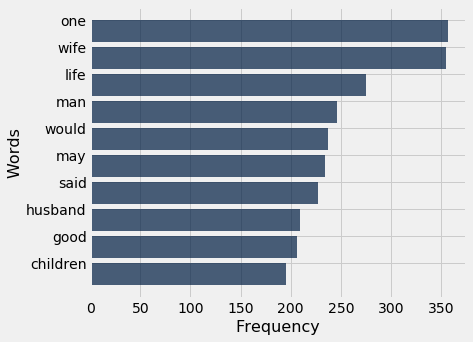

In [11]:
# nltk.download()
filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered)
most_common_words= [word for word, word_count in Counter(filtered).most_common(10)]
frequency= [word_count for word, word_count in Counter(filtered).most_common(10)]
# most_common10 = count.most_common(10)
# most_common10
# most_common10[0:][0]
frequency_table= Table().with_columns('Words', most_common_words, 'Frequency', frequency)
frequency_table.barh('Words', 'Frequency')

## WordCloud generator

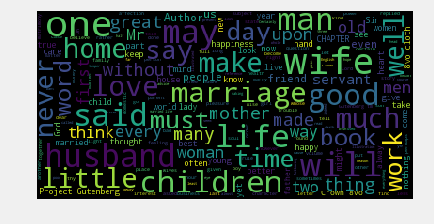

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
most_common_string=''.join(filtered)
# wordcloud = WordCloud(
#                       font_path='/Users/sebastian/Library/Fonts/CabinSketch-Bold.ttf',
# #                       stopwords=STOPWORDS,
#                       background_color='black',
#                       width=1800,
#                       height=1400
#                      ).generate(little_women_text[:50])

# plt.show(wordcloud)
# plt.axis('off')
# wordcloud = WordCloud(background_color='white',
#                           width=1200,
#                           height=1000
#                          ).generate(most_common_string)


# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(little_women_text)

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Insight about the book

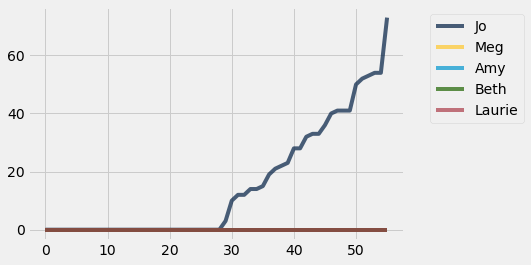

In [45]:
Table().with_columns([
    "Jo",   np.char.count(chapters, "Jo"),
    "Meg",  np.char.count(chapters, "Meg"),
    "Amy",  np.char.count(chapters, "Amy"),
    "Beth", np.char.count(chapters, "Beth"),
    "Laurie", np.char.count(chapters, "Laurie")
]).cumsum().plot(overlay=True)

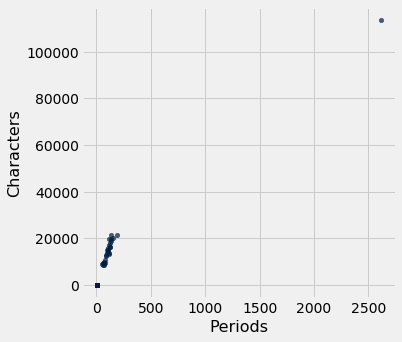

In [46]:
Table().with_columns([
        "Characters", [len(c) for c in chapters],
        "Periods", np.char.count(chapters, "."),
    ]).scatter('Periods')